# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

In [3]:
# Turn data into a DataFrame
import pandas as pd

data_df = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'y': y})
data_df[:5]

,X0,X1,y
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


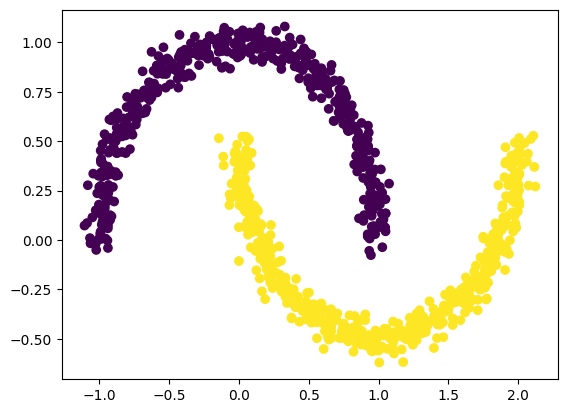

In [4]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [5]:
# Turn data into tensors of dtype float
X_t = torch.from_numpy(X).type(torch.float)
y_t = torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [6]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
      super().__init__()
      self.linear1 = nn.Linear(2, 10)
      self.relu1 = nn.ReLU()
      self.linear2 = nn.Linear(10, 5)
      self.relu2 = nn.ReLU()
      self.linear3 = nn.Linear(5, 3)
      self.relu3 = nn.ReLU()
      self.linear4 = nn.Linear(3, 1)

    def forward(self, x):
        ## Your code here ##
        l1 = self.linear1(x)
        l1 = self.relu1(l1)
        l2 = self.linear2(l1)
        l2 = self.relu1(l2)
        l3 = self.linear3(l2)
        l3 = self.relu1(l3)
        l4 = self.linear4(l3)
        return l4

# Instantiate the model
## Your code here ##
model1 = MoonModelV0()
model1.to(device)

MoonModelV0(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=10, out_features=5, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=5, out_features=3, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=3, out_features=1, bias=True)
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [7]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(params=model1.parameters(), lr=0.01)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [8]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
## Your code here ##
logits = model1(torch.randn(2).to(device))
print(logits)

# Prediction probabilities
print("Pred probs:")
## Your code here ##
probs = torch.sigmoid(logits)
print(probs)

# Prediction labels
print("Pred labels:")
## Your code here ##
label = torch.round(probs)
print(label)

Logits:
tensor([0.5575], device='cuda:0', grad_fn=<ViewBackward0>)
Pred probs:
tensor([0.6359], device='cuda:0', grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1.], device='cuda:0', grad_fn=<RoundBackward0>)


In [9]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [10]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 10000

# Send data to the device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model1.train()

  # 1. Forward pass (logits output)
  y_logits = model1(X_train).squeeze()
  # Turn logits into prediction probabilities
  y_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_probs)

  # 2. Calculaute the loss
  train_loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  train_loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model1.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    y_logits = model1(X_test).squeeze()

    # Turn the test logits into prediction labels
    y_probs = torch.sigmoid(y_logits)
    y_pred = torch.round(y_probs)

    # 2. Caculate the test loss/acc
    test_acc = acc_fn(y_pred, y_test.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels


  # Print out what's happening every 100 epochs
  if epoch % 500 == 0:
    print(epoch, 'train_loss', train_loss.item(), 'test_acc', test_acc.item())

0 train_loss 0.7447625398635864 test_acc 0.5550000071525574
500 train_loss 0.02637290023267269 test_acc 1.0
1000 train_loss 0.008853686973452568 test_acc 1.0
1500 train_loss 0.004446225240826607 test_acc 1.0
2000 train_loss 0.002635884564369917 test_acc 1.0
2500 train_loss 0.0017079245299100876 test_acc 1.0
3000 train_loss 0.0011683341581374407 test_acc 1.0
3500 train_loss 0.000828269578050822 test_acc 1.0
4000 train_loss 0.0006016019033268094 test_acc 1.0
4500 train_loss 0.0004448539693839848 test_acc 1.0
5000 train_loss 0.00033300629002042115 test_acc 1.0
5500 train_loss 0.0002518260444048792 test_acc 1.0
6000 train_loss 0.00019174105545971543 test_acc 1.0
6500 train_loss 0.0001466205285396427 test_acc 1.0
7000 train_loss 0.00011278079909970984 test_acc 1.0
7500 train_loss 8.678933227201924e-05 test_acc 1.0
8000 train_loss 6.717460928484797e-05 test_acc 1.0
8500 train_loss 5.197264181333594e-05 test_acc 1.0
9000 train_loss 4.020518827019259e-05 test_acc 1.0
9500 train_loss 3.13785167

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [11]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

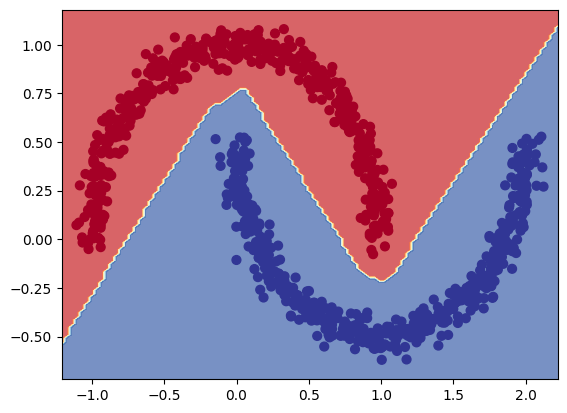

In [12]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model1, X_t, y_t)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [13]:
# Create a straight line tensor
tensor = torch.arange(-10, 10, 0.1)

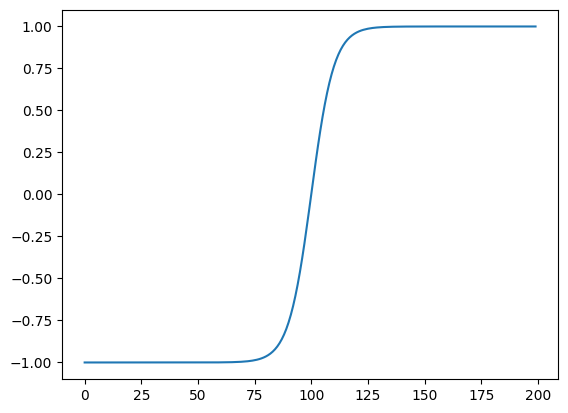

In [14]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(tensor))

<ipython-input-15-cbb3ddc7acfc>:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


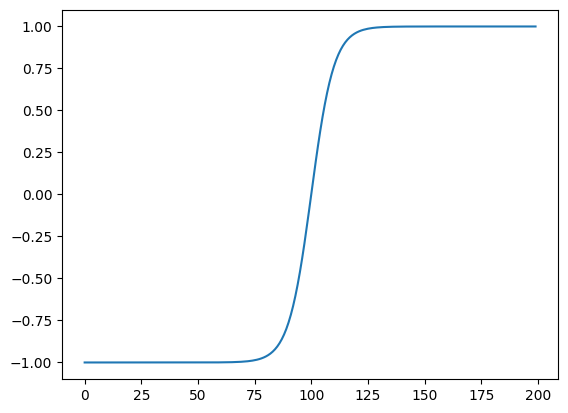

In [15]:
# Replicate torch.tanh() and plot it
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
plt.plot(tanh(tensor))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

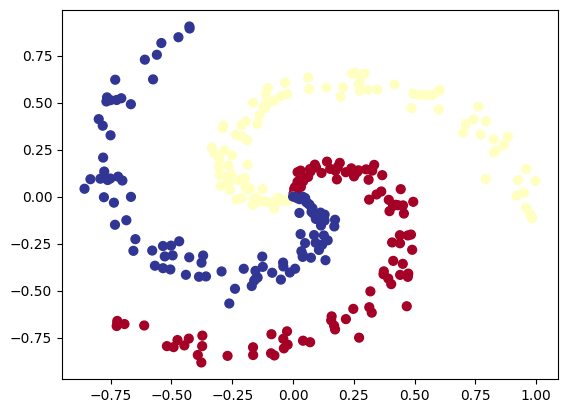

In [16]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [17]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [27]:
# Prepare device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(2, 10)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(10, 7)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(7, 4)
    self.relu3 = nn.ReLU()
    self.linear4 = nn.Linear(4, 3)

  def forward(self, x):
    l1 = self.relu1(self.linear1(x))
    l2 = self.relu2(self.linear2(l1))
    l3 = self.relu3(self.linear3(l2))
    l4 = self.linear4(l3)
    return l4

# Instantiate model and send it to device
spiralmodel1 = SpiralModelv1()
spiralmodel1.to(device)

SpiralModelv1(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=10, out_features=7, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=7, out_features=4, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=4, out_features=3, bias=True)
)

In [28]:
# Setup data to be device agnostic


# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
logits = spiralmodel1(X_test.to(device))
print(logits.shape)

print("Pred probs:")
## Your code here ##
probs = torch.softmax(logits, 1)
print(probs.shape)

print("Pred labels:")
## Your code here ##
preb = torch.argmax(probs, 1)
print(preb.shape)

Logits:
torch.Size([60, 3])
Pred probs:
torch.Size([60, 3])
Pred labels:
torch.Size([60])


In [29]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=spiralmodel1.parameters(), lr=0.01)

In [30]:
# Build a training loop for the model

# Loop over data
epochs = 10000
spiralmodel1.to(device)
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

  ## Training
for epoch in range(epochs):
  # 1. Forward pass
  spiralmodel1.train()
  y_logits = spiralmodel1(X_train)
  y_probs = torch.softmax(y_logits, 1)

  # 2. Calculate the loss
  train_loss = loss_fn(y_probs, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  spiralmodel1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_logits = spiralmodel1(X_test)
    y_probs = torch.softmax(y_logits, 1)
    y_pred = torch.argmax(y_probs, 1)

    # 2. Caculate loss and acc
    test_acc = acc_fn(y_pred, y_test)

  # Print out what's happening every 100 epochs
  if epoch % 500 == 0:
    print(epoch, 'train_loss', train_loss.item(), 'test_acc', test_acc.item())

0 train_loss 1.1018562316894531 test_acc 0.2666666805744171
500 train_loss 0.5852952599525452 test_acc 0.9333333373069763
1000 train_loss 0.5653724670410156 test_acc 0.9666666388511658
1500 train_loss 0.5642140507698059 test_acc 0.9666666388511658
2000 train_loss 0.5634908676147461 test_acc 0.9833333492279053
2500 train_loss 0.5594791173934937 test_acc 0.9833333492279053
3000 train_loss 0.5591081380844116 test_acc 0.9833333492279053
3500 train_loss 0.5589189529418945 test_acc 0.9833333492279053
4000 train_loss 0.5588055849075317 test_acc 0.9833333492279053
4500 train_loss 0.5587395429611206 test_acc 0.9833333492279053
5000 train_loss 0.5587024688720703 test_acc 0.9833333492279053
5500 train_loss 0.5586841702461243 test_acc 0.9833333492279053
6000 train_loss 0.5586685538291931 test_acc 0.9833333492279053
6500 train_loss 0.5586583018302917 test_acc 0.9833333492279053
7000 train_loss 0.5586503744125366 test_acc 0.9833333492279053
7500 train_loss 0.5586450099945068 test_acc 0.9833333492279

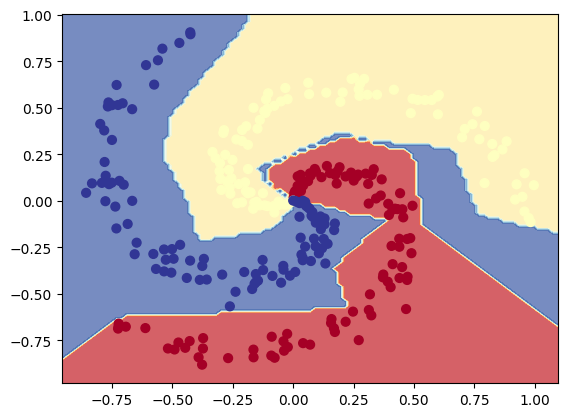

In [31]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(spiralmodel1, X, y)